## Step 1: Load the Data

The data used for this project is found in a CSV file adapted from the attached [GitHub repository](https://github.com/rfordatascience/tidytuesday/tree/main/data/2019/2019-02-12). It has been placed in a folder titled 'data' in my project repository for ease of access. The cell below will load the data as a Pandas data frame.

**Note:** Missing values, reported as NaN, represent data on a department that did not yet exist in the given year. These values have been changed to 0 to coincide with what was reported in the original dataset, representing no existing budget during these years. 

In [123]:
import pandas as pd

df = pd.read_csv('data/fed_rd_year&gdp.csv')
df = df.fillna(0) # replace NaN with 0, as found in the original dataset
display(df)

,department,1976_gdp1790000000000.0,1977_gdp2028000000000.0,1978_gdp2278000000000.0,1979_gdp2570000000000.0,1980_gdp2797000000000.0,1981_gdp3138000000000.0,1982_gdp3314000000000.0,1983_gdp3541000000000.0,1984_gdp3953000000000.0,...,2008_gdp14752000000000.0,2009_gdp14415000000000.0,2010_gdp14799000000000.0,2011_gdp15379000000000.0,2012_gdp16027000000000.0,2013_gdp16516000000000.0,2014_gdp17244000000000.0,2015_gdp17983000000000.0,2016_gdp18470000000000.0,2017_gdp19177000000000.0
0,DHS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1155000000,1258000000,1009000000,848000000,527000000,737000000,1092000000,960000000,602000000,735000000
1,DOC,8.190000e+08,8.370000e+08,8.710000e+08,9.520000e+08,9.450000e+08,8.290000e+08,6.930000e+08,7.000000e+08,7.550000e+08,...,1379000000,1594000000,1521000000,1357000000,1373000000,1397000000,1641000000,1596000000,1730000000,1824000000
2,DOD,3.569600e+10,3.796700e+10,3.702200e+10,3.717400e+10,3.700500e+10,4.173700e+10,4.689300e+10,5.100800e+10,5.813900e+10,...,94247000000,93527000000,94325000000,88220000000,81543000000,70583000000,70341000000,69522000000,75213000000,51862000000
3,DOE,1.088200e+10,1.374100e+10,1.566300e+10,1.561200e+10,1.522600e+10,1.479800e+10,1.216000e+10,1.112900e+10,1.173100e+10,...,11343000000,11823000000,12329000000,11902000000,11839000000,11528000000,12686000000,15033000000,15504000000,15032000000
4,DOT,1.142000e+09,1.095000e+09,1.156000e+09,1.004000e+09,1.048000e+09,9.780000e+08,7.020000e+08,8.000000e+08,1.018000e+09,...,1016000000,1062000000,1221000000,1064000000,1007000000,881000000,843000000,926000000,910000000,936000000
5,EPA,9.680000e+08,9.660000e+08,1.175000e+09,1.102000e+09,9.030000e+08,9.010000e+08,6.410000e+08,5.010000e+08,5.180000e+08,...,636000000,646000000,679000000,649000000,622000000,570000000,569000000,544000000,530000000,506000000
6,HHS,9.226000e+09,9.507000e+09,1.053300e+10,1.012700e+10,1.004500e+10,9.644000e+09,8.860000e+09,9.418000e+09,1.014500e+10,...,33964000000,35649000000,36134000000,34773000000,34360000000,32095000000,32438000000,31537000000,33121000000,34758000000
7,Interior,1.152000e+09,1.082000e+09,1.125000e+09,1.176000e+09,1.082000e+09,9.900000e+08,8.660000e+08,8.350000e+08,7.570000e+08,...,794000000,805000000,883000000,844000000,898000000,846000000,889000000,903000000,1005000000,955000000
8,NASA,1.251300e+10,1.255300e+10,1.251600e+10,1.307900e+10,1.383700e+10,1.327600e+10,1.032200e+10,5.893000e+09,6.231000e+09,...,12985000000,10087000000,10538000000,10147000000,12391000000,11845000000,12432000000,11927000000,13713000000,12361000000
9,NIH,8.025000e+09,8.214000e+09,8.802000e+09,9.243000e+09,9.093000e+09,8.580000e+09,8.314000e+09,8.733000e+09,9.620000e+09,...,33130000000,34150000000,34348000000,33265000000,32865000000,30522000000,30938000000,30046000000,31675000000,33052000000


## Step 2: Data Cleaning and Tidy Data Processes

### Tidy Data Violation 1:
In the data displayed above, the year and GDP are embedded in the column names rather than in separate 'year' and 'GDP' columns. With tidy data, we want to ensure that each variable belongs to its own column. 

### Solution:
The pandas melt function `pd.melt()` is first used to reformat the data, using the parameters explained below. Since the column names contain both the year and the GDP value, this new column must then be split into two separate columns using `.str.split()`.

### Parameters:
- `id_vars` = 'department'
    - Keeps the 'department' column fixed, allowing them to act as identifiers.
- `value_vars` = df.columns[2:]
    - Converts all column names from column 2 onward into row values. 
- `var_name` = 'year_gdp'
    - Name for the new column that will hold the former column names.
- `value_name` = 'rd_budget'
    - Name for the new column that will hold the values from the melted columns.


In [124]:
# using pd.melt() to convert from wide to long format
df_melted = pd.melt(df, id_vars='department',
                    value_vars=df.columns[2:],
                    var_name='year_gdp', value_name='rd_budget')

# split the year_gdp column into two separate variables
df_melted[['year', 'gdp']] = df_melted['year_gdp'].str.split('_gdp', expand=True)
df_melted = df_melted.drop('year_gdp', axis=1) # remove column with combined values
df_melted['gdp'] = pd.to_numeric(df_melted['gdp'], errors='coerce') # change gdp column to numeric

# reorder the columns
df_melted = df_melted[['department', 'year', 'rd_budget', 'gdp']]

display(df_melted)

,department,year,rd_budget,gdp
0,DHS,1977,0.000000e+00,2.028000e+12
1,DOC,1977,8.370000e+08,2.028000e+12
2,DOD,1977,3.796700e+10,2.028000e+12
3,DOE,1977,1.374100e+10,2.028000e+12
4,DOT,1977,1.095000e+09,2.028000e+12
...,...,...,...,...
569,NIH,2017,3.305200e+10,1.917700e+13
570,NSF,2017,6.040000e+09,1.917700e+13
571,Other,2017,1.553000e+09,1.917700e+13
572,USDA,2017,2.625000e+09,1.917700e+13


## Step 2: Data Cleaning and Tidy Data Processes (Continued)

### Tidy Data Violation 2:
In tidy data, each type of observational unit should form its own table. In the data frame above, you may notice that the values in the GDP column remain constant over department types within any given year, as GDP is an observation of the year alone, whereas the R&D budget is an observation of both the year and the department. 

### Solution:
Since the R&D budget and GDP are two separate observational units, the data can be simplified by splitting them into two separate tables. 

In [129]:
# create own table for each observational unit
gdp_df = df_melted[['year', 'gdp']].drop_duplicates()
display(gdp_df.head(10))

budget_df = df_melted[['department', 'year', 'rd_budget']]
display(budget_df)

,year,gdp
0,1977,2.028000e+12
14,1978,2.278000e+12
28,1979,2.570000e+12
42,1980,2.797000e+12
56,1981,3.138000e+12
70,1982,3.314000e+12
84,1983,3.541000e+12
98,1984,3.953000e+12
112,1985,4.270000e+12
126,1986,4.536000e+12


,department,year,rd_budget
0,DHS,1977,0.000000e+00
1,DOC,1977,8.370000e+08
2,DOD,1977,3.796700e+10
3,DOE,1977,1.374100e+10
4,DOT,1977,1.095000e+09
...,...,...,...
569,NIH,2017,3.305200e+10
570,NSF,2017,6.040000e+09
571,Other,2017,1.553000e+09
572,USDA,2017,2.625000e+09


## Step 3: Visualizations
Both tables measure two numeric variables, year and GDP or budget. To understand how these variables fluctuate over time, we will create two basic line plots tracking these changes from 1977 to 2017 using `sns.lineplot()`.

### Parameters:
- `x` = 'year'
    - Sets the x-axis to the year variable, which ranges from 1977 to 2017 for both tables. 
- `y` = 'gdp' or `y` = 'rd_budget'
    - Sets the y-axis to the variable of interest, GDP or R&D budget.
- `data` = gdp_df or `data` = budget_df
    - Sets the proper dataframe that you want seaborn to pull data from. 
- `hue` = 'department'
    - Used only in the second plot to create multiple colored lines corresponding to the department type.
    - The first plot does not require this parameter, since GDP was not an observation of department type. 

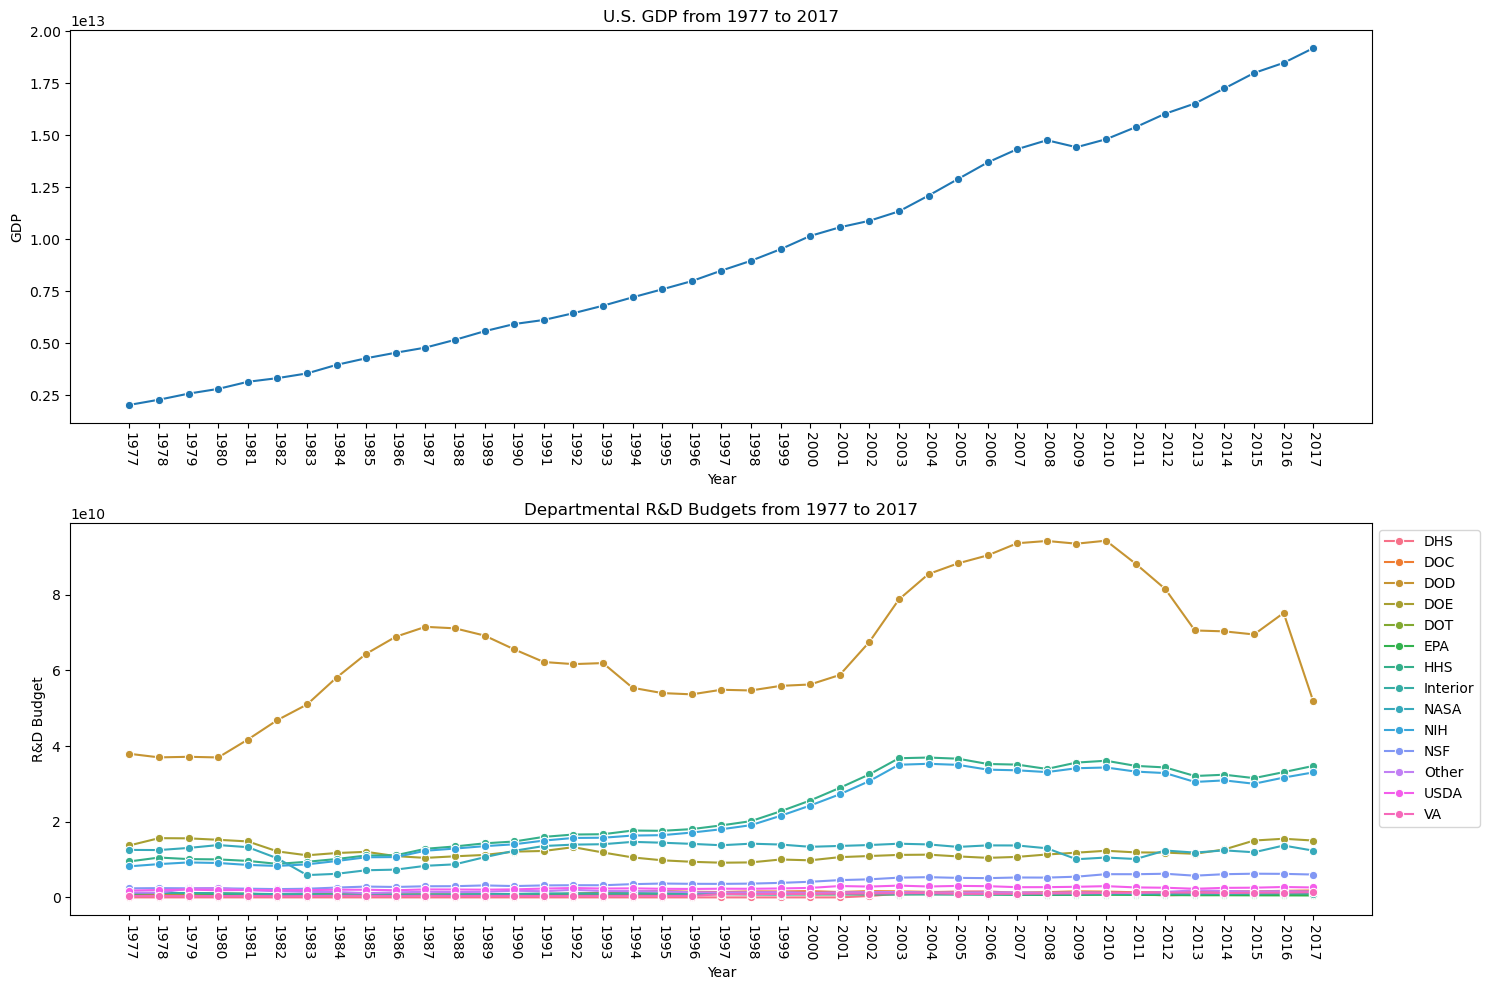

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10)) 

# Plot U.S. GDP by Year
sns.lineplot(ax=axes[0], x='year', y='gdp', data=gdp_df, marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].set_title('U.S. GDP from 1977 to 2017')
axes[0].tick_params(axis='x', rotation=-90)  # Rotate labels

# Plot Departmental R&D Budgets by Year
sns.lineplot(ax=axes[1], x='year', y='rd_budget', data=budget_df, marker='o', hue='department')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('R&D Budget')
axes[1].set_title('Departmental R&D Budgets from 1977 to 2017')
axes[1].tick_params(axis='x', rotation=-90)  # Rotate labels
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot

# Display plots
plt.tight_layout()
plt.show()

## Step 3: Visualizations (Continued)
In the figure above, we can compare trends in GDP to trends in R&D budgets over time. It is clear that GDP has, for the most part, steadily increased. There are several departments that appear to show a 

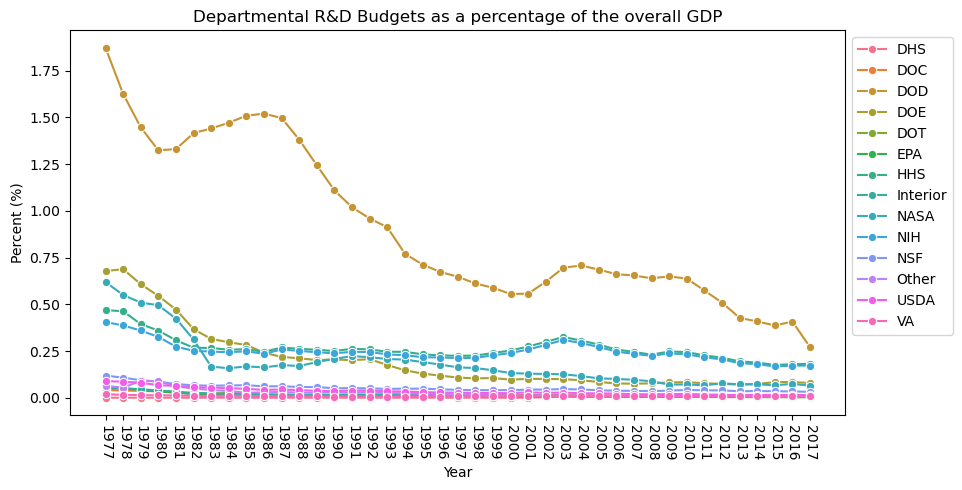

In [127]:
# visualize R&D budget as a percentage of the overall GDP

# create new column to display budget as a percentage of gdp
df_melted['budget_as_percent_gdp'] = df_melted['rd_budget'] / df_melted['gdp'] * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='budget_as_percent_gdp', data=df_melted, marker='o', hue='department')

# Labels and title
plt.xlabel('Year')  
plt.ylabel('Percent (%)')
plt.title('Departmental R&D Budgets as a percentage of the overall GDP')

# additional formatting settings
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=-90)

# Show the plot
plt.show()


In [128]:
pd.pivot_table(df_melted,
               index= "department",
               values= "rd_budget",
               aggfunc= "mean")

,rd_budget
department,
DHS,3.882439e+08
DOC,1.241561e+09
DOD,6.539224e+10
DOE,1.190780e+10
DOT,9.123171e+08
EPA,7.451220e+08
HHS,2.261556e+10
Interior,8.944390e+08
NASA,1.213117e+10
